In [1]:
import sys
sys.path.append("..")
from cavsim2d.cavity import Cavity, Cavities, OperationPoints
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
# %matplotlib inline
import pprint
pp = pprint.PrettyPrinter(indent=4)

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.


  0%|          | 0/2 [00:00<?, ?it/s]

['G0_C1_P', 'G0_C2_P', 'G0_C4_P'] []
Pareto: 2 optimal values, 2 objects
       key     A     B     a     b    Ri     L         Req     alpha_i  \
0  G0_C2_P  38.0  50.0  25.0  25.0  77.5  93.5  183.668114  119.362688   
1  G0_C1_P  62.0  74.0  15.0  15.0  72.5  93.5  174.812752  114.818069   
2  G0_C4_P  26.0  26.0  35.0  35.0  62.5  93.5  182.458225  114.271444   

      alpha_o  freq [MHz]  Epk/Eacc []  Bpk/Eacc [mT/MV/m]  ZL [max(1<f<2)]  \
0  119.362688  801.583274     1.791082            5.506397         0.161519   
1  114.818069  801.577173     1.911991            4.733127         2.685337   
2  114.271444  801.582857     1.803702            5.537494         2.242853   

   ZL [max(2<f<5)]  rank_Epk/Eacc []  rank_Bpk/Eacc [mT/MV/m]  \
0         0.038291               1.0                      2.0   
1         0.332051               3.0                      1.0   
2         0.071294               2.0                      3.0   

   rank_ZL [max(1<f<2)]  rank_ZL [max(2<f<5)]  total

D:\Dropbox\cavsim2d\notebooks\..\cavsim2d\cavity.py:579: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ng = pd.concat([df_cross, df_mutation, df_chaos], ignore_index=True)


['G0_C0_CO', 'G0_C1_CO', 'G0_C2_CO', 'G0_C3_CO', 'G0_C4_CO'] []
Pareto: 6 optimal values, 6 objects
        key     A     B     a     b     Ri     L         Req     alpha_i  \
0  G0_C3_CO  35.0  44.0  25.0  25.0  72.50  93.5  183.090474  118.553499   
1   G0_C2_P  38.0  50.0  25.0  25.0  77.50  93.5  183.668114  119.362688   
2  G0_C0_CO  32.0  50.0  30.0  30.0  72.50  93.5  186.011429  118.057120   
3  G0_C1_CO  35.0  38.0  27.5  27.5  72.50  93.5  181.621062  117.250197   
4  G0_C2_CO  35.0  44.0  25.0  25.0  68.75  93.5  182.144454  117.711355   
5   G0_C1_P  62.0  74.0  15.0  15.0  72.50  93.5  174.812752  114.818069   
6  G0_C4_CO  32.0  44.0  27.5  25.0  68.75  93.5  183.940905  117.323461   
7   G0_C4_P  26.0  26.0  35.0  35.0  62.50  93.5  182.458225  114.271444   

      alpha_o  freq [MHz]  Epk/Eacc []  Bpk/Eacc [mT/MV/m]  ZL [max(1<f<2)]  \
0  118.553499  801.577542     1.761335            5.407136         1.051522   
1  119.362688  801.583274     1.791082            5.50639

D:\Dropbox\cavsim2d\notebooks\..\cavsim2d\cavity.py:579: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ng = pd.concat([df_cross, df_mutation, df_chaos], ignore_index=True)


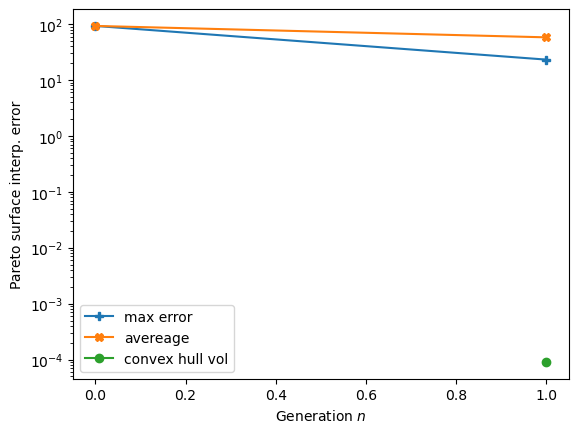

In [2]:
cavs = Cavities([])
# must first save cavities
cavs.save('D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')
cell_type = 'end-end-cell'
optimisation_config = {
    'initial_points': 5,
    'method': {
        'LHS': {'seed': 5},
        # 'Sobol Sequence': {'index': 2},
        # 'Random': {},
        # 'Uniform': {},
        },
    # 'mid-cell': [1, 2, 3, 3, 6, 5, 2],  # must enter if mid-end cell selected
    'tune_config': {
        'freqs': 801.58,
        'parameters': 'Req',
        'cell_types': cell_type,
        'processes': 1
    },
    'wakefield_config': {},
    'optimisation by': 'pareto',
    'crossover_factor': 5,
    'elites_for_crossover': 2,
    'mutation_factor': 5,
    'chaos_factor': 5,
    'processes': 3,
    'no_of_generation': 2,
    'bounds': {'A': [20.0, 80.0],
               'B': [20.0, 80.0],
               'a': [10.0, 60.0],
               'b': [10., 60.0],
               'Ri': [60.0, 85.0],
               'L': [93.5, 93.5],
               'Req': [170.0, 170.0]},
    'objectives': [
        # ['equal', 'freq [MHz]', 801.58],
                      ['min', 'Epk/Eacc []'],
                      ['min', 'Bpk/Eacc [mT/MV/m]'],
                      ['min', 'ZL', [1, 2, 5]],
                  ],
    'weights': [1, 1, 1, 1],
    'uq_config': {
        'processes': 5,
        'variables': ['A', 'a'],
        'delta': [0.05, 0.05],
        'distribution': 'gaussian',
        # 'method': ['QMC', 'LHS', 1000],
        # 'method': ['QMC', 'Sobol', 1000],
        # 'method': ['Qudrature', 'Gaussian', 1000],
        'method': ['Quadrature', 'Stroud3'],
        # 'method': ['Quadrature', 'Stroud5'],
        # 'gaussian': ['Quadrature', 'Gaussian'],
        # 'from file': ['<file path>', columns],
        'cell type': cell_type
        }
}
cavs.run_optimisation(optimisation_config)